<a href="https://colab.research.google.com/github/jiangshoute/DeepLearning_memo/blob/main/Colaboratory_%E3%81%B8%E3%82%88%E3%81%86%E3%81%93%E3%81%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

mnist.load_data()で中身を訓練データ(x_train, y_train)と、テストデータ(x_test, y_test)に分ける。

xには28×28サイズの手書き数字画像（の0~255輝度値）が、yにはその数字のラベルが入っている。

x_train, x_test = x_train / 255.0, x_test / 255.0 で、データの値の範囲が0~1になるように正規化している。


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


下記のコードで確認してみると、上のような「5」の画像が得られ、「5」というラベルがprintされる。

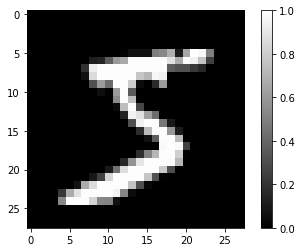

5


In [5]:
#@title デフォルトのタイトル テキスト
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
#plt.savefig('x_train[0]')
plt.show()

print(y_train[0])

層を積み重ねてtf.keras.Sequentialモデルを構築します。訓練のためにオプティマイザと損失関数を選びます。

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#28×28サイズの2次元データを784の1次元データに平滑化する
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.07706113,  0.64945984,  0.21805164,  0.16290754, -0.14423588,
        -0.02847019,  0.31607726, -0.19269603,  0.03611641,  0.29784125]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.07927518, 0.16393109, 0.1064886 , 0.10077535, 0.07412482,
        0.08322237, 0.11745597, 0.07061837, 0.08877479, 0.11533346]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.4862392

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4842 - accuracy: 0.8593
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1503 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1064 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0725 - accuracy: 0.9777


In [11]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0742 - accuracy: 0.9765


[0.07416972517967224, 0.9764999747276306]